<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_data1_xls_split_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch

In [ ]:
import pandas as pd

In [ ]:
import torch
from torch import nn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib as mpl

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
file_path="/content/logs_CAD_2024_1.xlsx"

In [ ]:
data = pd.read_excel("/content/logs_CAD_2024_1.xlsx")

In [ ]:
display(pd.DataFrame(data))

,timestamp,user_id,tool_id,log_count,lesson,day_part
0,"15/04/24, 11:37:03",26861,233243,3.0,0,1
1,"15/04/24, 11:37:03",26861,233243,0.0,0,1
2,"15/04/24, 11:37:03",26861,233243,0.0,0,1
3,"15/04/24, 11:30:50",26861,2949,1.0,0,1
4,"15/04/24, 11:30:37",26861,244208,3.0,0,1
...,...,...,...,...,...,...
6091,"1/02/24, 20:00:42",29349,2949,0.0,0,3
6092,"29/01/24, 19:00:53",29349,2949,0.0,0,3
6093,"29/01/24, 19:00:52",29349,2949,0.0,0,3
6094,"29/01/24, 19:00:52",29349,2949,0.0,0,3


In [ ]:
file_path = '/content/logs_CAD_2024_1.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Ensure there are 6096 rows
assert len(df) == 6096, "The DataFrame does not have 6096 rows."

In [ ]:
# Convert 'timestamp' to datetime format
# Coerce errors to handle invalid timestamps
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

<ipython-input-28-db1ff2735581>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [ ]:
# Display rows with NaT (if any) to understand the issue
invalid_timestamps = df[df['timestamp'].isna()]
if not invalid_timestamps.empty:
    print("Invalid timestamps found:")
    print(invalid_timestamps)

Invalid timestamps found:
     timestamp  user_id  tool_id  log_count  lesson  day_part
237        NaT    29292   233258        2.0       0         4
238        NaT    29292   233258        0.0       0         4
239        NaT    29292     2949        1.0       0         4
240        NaT    29292   233243        2.0       0         4
241        NaT    29292   233243        0.0       0         4
...        ...      ...      ...        ...     ...       ...
5423       NaT    20544     2949        1.0       0         1
5424       NaT    20544   233220        2.0       0         1
5425       NaT    20544   233220        0.0       0         1
5426       NaT    20544     2949        1.0       0         1
5427       NaT    29350     2949        1.0       0         1

[97 rows x 6 columns]


In [ ]:
# Optionally, handle the NaT values (e.g., drop them)
df = df.dropna(subset=['timestamp'])

In [ ]:
# Extract date and time into separate columns
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time

In [ ]:
# Display the resulting DataFrame
print(df.head())

            timestamp  user_id  tool_id  log_count  lesson  day_part  \
0 2024-04-15 11:37:03    26861   233243        3.0       0         1   
1 2024-04-15 11:37:03    26861   233243        0.0       0         1   
2 2024-04-15 11:37:03    26861   233243        0.0       0         1   
3 2024-04-15 11:30:50    26861     2949        1.0       0         1   
4 2024-04-15 11:30:37    26861   244208        3.0       0         1   

         date      time  
0  2024-04-15  11:37:03  
1  2024-04-15  11:37:03  
2  2024-04-15  11:37:03  
3  2024-04-15  11:30:50  
4  2024-04-15  11:30:37  


In [ ]:
# Path to save the new Excel file
new_file_path = '/content/split_data.xlsx'

In [ ]:
# Save the DataFrame to a new Excel file
df.to_excel(new_file_path, index=False)

Settings

In [ ]:
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

Feature Engineering

In [ ]:
df = pd.read_excel("/content/logs_CAD_2024_1.xlsx")
test_df = pd.read_excel("/content/logs_CAD_2024_1.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6096 entries, 0 to 6095
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6096 non-null   object 
 1   user_id    6096 non-null   int64  
 2   tool_id    6096 non-null   int64  
 3   log_count  6095 non-null   float64
 4   lesson     6096 non-null   int64  
 5   day_part   6096 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 285.9+ KB


In [ ]:
df.sample(n=5)

,timestamp,user_id,tool_id,log_count,lesson,day_part
4196,"25/02/24, 18:55:29",29340,233221,0.000,0,3
4191,"20/02/24, 07:50:31",20789,2949,0.000,0,0
5731,"5/02/24, 17:34:30",20804,233214,0.000,1,3
450,"4/04/24, 11:14:51",29723,233258,0.000,1,1
2642,"20/03/24, 08:30:40",20503,2949,1.000,1,1


In [ ]:
def feature_engineering(df): #feature engineering function

    return df

In [ ]:
df = feature_engineering(df)

Remove columns I no longer need

In [ ]:
df = df.drop(['timestamp'], axis=1)

In [ ]:
df.sample(n=5)

,user_id,tool_id,log_count,lesson,day_part
6035,20544,2949,1.000,0,3
1853,20004,2949,1.000,1,1
2663,29340,233239,0.000,0,3
30,26861,233243,3.000,0,1
3300,20004,2949,1.000,1,1


Data Cleaning

In [ ]:
df.isna().sum()

user_id      0
tool_id      0
log_count    1
lesson       0
day_part     0
dtype: int64

Min-max scaling

Normalization

In [ ]:
def scale_min_max(df, col_name, xmin, xmax):
    df[col_name] = (df[col_name] - xmin) / (xmax - xmin)
    return df

train_age_min = df['log_count'].min()
train_age_max = df['log_count'].max()
df = scale_min_max(df, 'log_count', train_age_min, train_age_max)

df['log_count'].describe()

count   6095.000
mean       0.036
std        0.064
min        0.000
25%        0.000
50%        0.000
75%        0.037
max        1.000
Name: log_count, dtype: float64

Dummy variables addition:

In [ ]:
def add_dummies(df, cols):
    df = pd.get_dummies(df, columns=cols)
    return df

cols = ['user_id']
df = add_dummies(df, cols)

print(df.columns, '\n', len(df.columns))



Index(['tool_id', 'log_count', 'lesson', 'day_part', 'user_id_20004',
       'user_id_20010', 'user_id_20503', 'user_id_20544', 'user_id_20700',
       'user_id_20789', 'user_id_20804', 'user_id_23030', 'user_id_23558',
       'user_id_26861', 'user_id_29084', 'user_id_29133', 'user_id_29292',
       'user_id_29340', 'user_id_29349', 'user_id_29350', 'user_id_29598',
       'user_id_29723'],
      dtype='object') 
 22


Data is procecced

In [ ]:
test_proc = (test_df.pipe(feature_engineering) #Apply the same data processing steps to the test set
                    .drop(['tool_id', 'timestamp'], axis=1)
                    .pipe(scale_min_max, 'log_count', train_age_min, train_age_max)
                    .pipe(add_dummies, cols)
)

test_proc.sample(6)


,log_count,lesson,day_part,user_id_20004,user_id_20010,user_id_20503,user_id_20544,user_id_20700,user_id_20789,user_id_20804,...,user_id_23558,user_id_26861,user_id_29084,user_id_29133,user_id_29292,user_id_29340,user_id_29349,user_id_29350,user_id_29598,user_id_29723
2252,0.000,0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5056,0.000,0,3,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2654,0.000,0,3,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5259,0.000,0,4,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4808,0.074,1,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1921,0.037,0,4,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:16], all_data.loc[16:].drop(['timestamp'], axis=1)

df_train = pd.read_excel("/content/logs_CAD_2024_1.xlsx")
df_test = pd.read_excel("/content/logs_CAD_2024_1.xlsx")


df_train.name = 'Training Set'
df_test.name = 'Test Set'


dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['user_id'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 6096
Number of Test Examples = 6096

Training X Shape = (6096, 6)
Training y Shape = 6096

Test X Shape = (6096, 6)
Test y Shape = 6096

Index(['timestamp', 'user_id', 'tool_id', 'log_count', 'lesson', 'day_part'], dtype='object')
Index(['timestamp', 'user_id', 'tool_id', 'log_count', 'lesson', 'day_part'], dtype='object')


In [ ]:
print(df_train.info())
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6096 entries, 0 to 6095
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6096 non-null   object 
 1   user_id    6096 non-null   int64  
 2   tool_id    6096 non-null   int64  
 3   log_count  6095 non-null   float64
 4   lesson     6096 non-null   int64  
 5   day_part   6096 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 285.9+ KB
None


,timestamp,user_id,tool_id,log_count,lesson,day_part
2384,"21/03/24, 09:31:14",20700,233238,0.000,1,1
1115,"2/04/24, 00:07:54",20004,233243,0.000,0,5
4923,"15/02/24, 08:28:00",29340,2949,1.000,0,1


In [ ]:
# Ensure 'timestamp' column is dropped from both training and test datasets
df_train_cleaned = df_train.drop(['timestamp'], axis=1)
df_test_cleaned = df_test.drop(['timestamp'], axis=1)

In [ ]:
# Verify all columns in df_train_cleaned and df_test_cleaned are numeric
numeric_columns_train = df_train_cleaned.select_dtypes(include=[int, float]).columns
numeric_columns_test = df_test_cleaned.select_dtypes(include=[int, float]).columns

In [ ]:
# Compute correlations only on numeric columns
df_train_corr = df_train_cleaned[numeric_columns_train].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

In [ ]:
df_test_corr = df_test_cleaned[numeric_columns_test].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [ ]:
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1 # Training set correlations
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,lesson,day_part,0.293
8,lesson,tool_id,0.138


In [ ]:
corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,lesson,day_part,0.293
8,lesson,tool_id,0.138


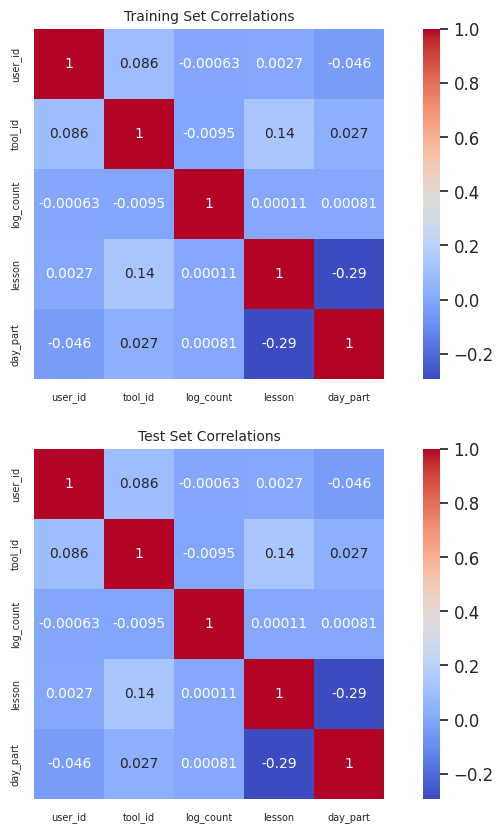

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

sns.heatmap(df_train.drop(['timestamp'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
sns.heatmap(df_test.drop(['timestamp'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=7)
    axs[i].tick_params(axis='y', labelsize=7)

axs[0].set_title('Training Set Correlations', size=10)
axs[1].set_title('Test Set Correlations', size=10)

plt.show()

Lesson and Day_Part correlation Coefficient: -0.293
There is a weak negative correlation between the lesson and day_part features. This means that as one feature's value increases, the other feature's value tends to decrease slightly. The relationship is not strong, suggesting other factors might influence these features.


Lesson and Tool_ID correlation Coefficient: 0.138
There is a very weak positive correlation between the lesson and tool_id features. This indicates a slight tendency for the values of these features to increase together, but the relationship is very weak and likely not significant. This suggests that lesson and tool_id are primarily independent of each other in terms of their linear relationship.